# Multivariate Analysis

Loading the cleaned dataset

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [100]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [101]:
lcdci_df = pd.read_csv('lcdci.csv')
lcdci_df.head()

,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,0.82,11.2,1.0,1993.0,0.745,99.7,0.2,161563.000,86543.923620,12578.747600
1,Angola,African Group,53.43,148.0,0.0,2000.0,0.591,50.0,61.0,19814.500,32703.238110,17757.867840
2,Benin,African Group,27.80,10.3,1.0,1994.0,0.504,4.6,46.2,7980.400,4029.619412,3007.644632
3,Botswana,African Group,26.92,2.4,1.0,1994.0,0.708,65.7,27.2,5763.687,3434.493820,2963.633551
4,Burkina Faso,African Group,22.72,12.5,1.0,1993.0,0.438,11.7,67.5,5456.700,15408.273140,10060.671930


In [102]:
lcdci_df.describe()

,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02,191.000000
mean,32.446649,229.190339,0.937173,1995.366492,0.721461,67.895729,32.500524,1.721520e+05,4.365359e+04,15980.829925
std,23.877781,670.004507,0.243290,3.726396,0.155448,37.137400,27.686081,8.743299e+05,1.277418e+05,50051.077037
min,0.000000,-193.460871,0.000000,1992.000000,0.380000,0.000000,0.000000,6.600000e+00,2.588257e+00,0.000000
25%,11.445000,6.000000,1.000000,1993.500000,0.601000,35.300000,10.600000,2.673385e+03,2.525349e+03,684.390306
50%,31.170000,37.700000,1.000000,1994.000000,0.739000,87.000000,23.800000,1.443550e+04,9.957260e+03,3567.365768
75%,49.425000,152.100000,1.000000,1995.000000,0.845500,100.000000,50.000000,6.769175e+04,3.119410e+04,12491.469910
max,97.410000,5661.000000,1.000000,2015.000000,0.967000,100.000000,96.200000,1.094469e+07,1.186285e+06,536920.210300


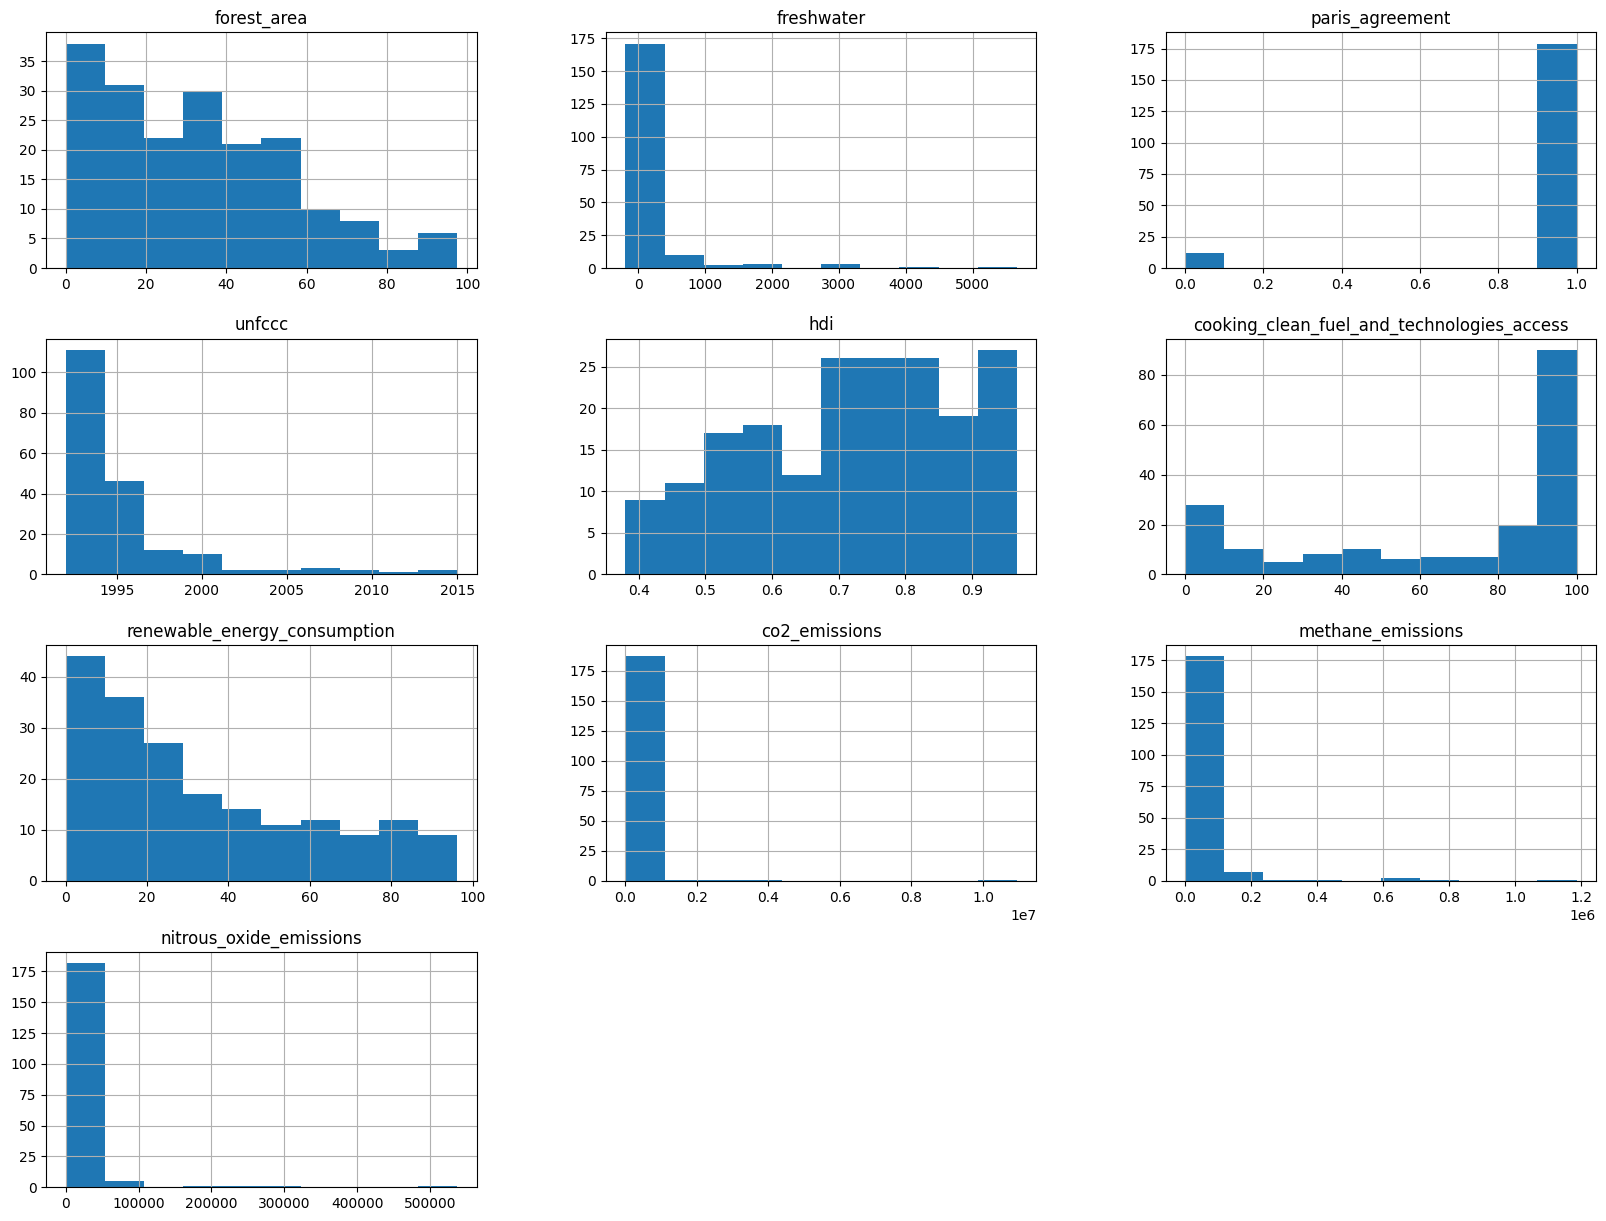

In [103]:
lcdci_df.hist(figsize=(20, 15))  # Histograms of all columns
plt.show()

In [104]:
forest_area = lcdci_df['forest_area']
freshwater = lcdci_df['freshwater']
paris_agreement = lcdci_df['paris_agreement']
unfccc = lcdci_df['unfccc']
hdi = lcdci_df['hdi']
clean_cooking_fuel_access = lcdci_df['cooking_clean_fuel_and_technologies_access']
renewable_energy_consumption = lcdci_df['renewable_energy_consumption']
co2_emissions = lcdci_df['co2_emissions']
methane_emissions = lcdci_df['methane_emissions']
nitrous_oxide_emissions = lcdci_df['nitrous_oxide_emissions']

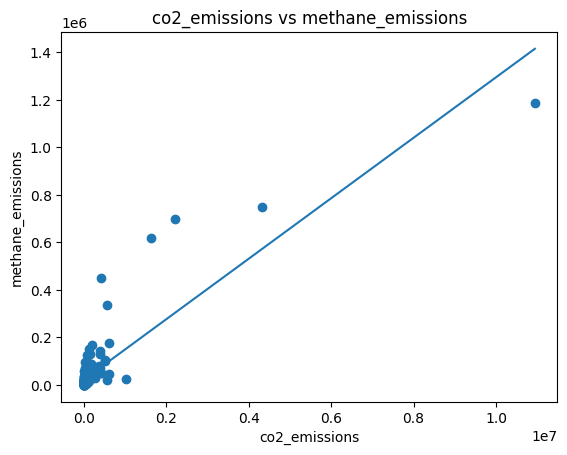

In [105]:
plt.title("co2_emissions vs methane_emissions")
plt.xlabel("co2_emissions")
plt.ylabel("methane_emissions")
plt.scatter(co2_emissions, methane_emissions)
plt.plot(np.unique(co2_emissions), np.poly1d(np.polyfit(co2_emissions, methane_emissions, 1))(np.unique(co2_emissions)))

In [106]:
corr = pearsonr(co2_emissions, methane_emissions)
corr

PearsonRResult(statistic=0.8712302668875839, pvalue=2.6044145682599243e-60)

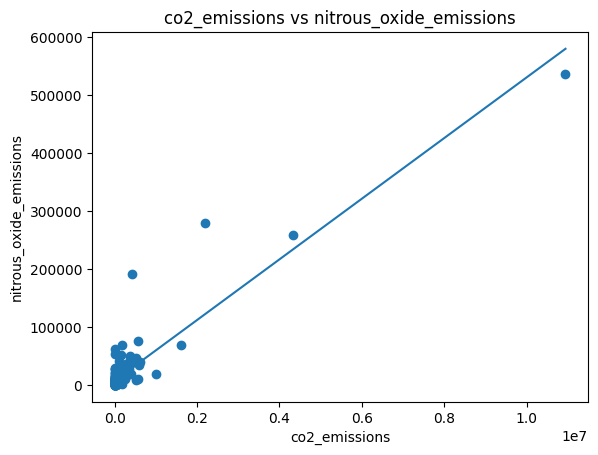

In [107]:
plt.title("co2_emissions vs nitrous_oxide_emissions")
plt.xlabel("co2_emissions")
plt.ylabel("nitrous_oxide_emissions")
plt.scatter(co2_emissions, nitrous_oxide_emissions)
plt.plot(np.unique(co2_emissions), np.poly1d(np.polyfit(co2_emissions, nitrous_oxide_emissions, 1))(np.unique(co2_emissions)))

In [108]:
corr = pearsonr(co2_emissions, nitrous_oxide_emissions)
corr

PearsonRResult(statistic=0.9144070733818833, pvalue=3.7082616591875925e-76)

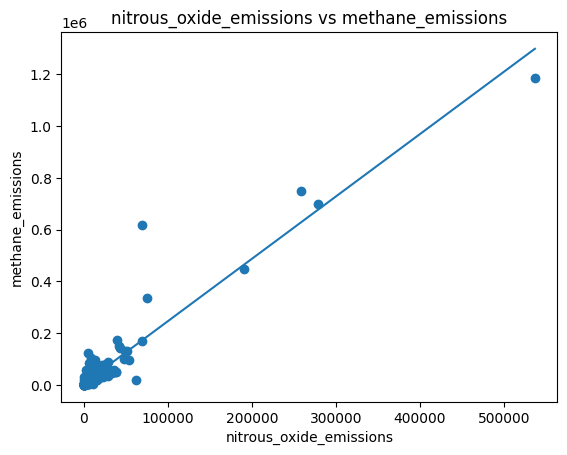

In [109]:
plt.title("nitrous_oxide_emissions vs methane_emissions")
plt.xlabel("nitrous_oxide_emissions")
plt.ylabel("methane_emissions")
plt.scatter(nitrous_oxide_emissions, methane_emissions)
plt.plot(np.unique(nitrous_oxide_emissions), np.poly1d(np.polyfit(nitrous_oxide_emissions, methane_emissions, 1))(np.unique(nitrous_oxide_emissions)))

In [110]:
corr = pearsonr(nitrous_oxide_emissions, methane_emissions)
corr

PearsonRResult(statistic=0.944359923976579, pvalue=3.282881930133654e-93)

Combine CO2 emission, methane emission, and nitrous oxide emission into one as they are strongly correlated and has the same unit of measurement

In [111]:
lcdci_df["total_greenhouse_gas_emission"] = lcdci_df["co2_emissions"] + lcdci_df["methane_emissions"] + lcdci_df["nitrous_oxide_emissions"]
total_greenhouse_gas_emission = lcdci_df['total_greenhouse_gas_emission']
lcdci_df.head()

,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission
0,Algeria,African Group,0.82,11.2,1.0,1993.0,0.745,99.7,0.2,161563.000,86543.923620,12578.747600,260685.671220
1,Angola,African Group,53.43,148.0,0.0,2000.0,0.591,50.0,61.0,19814.500,32703.238110,17757.867840,70275.605950
2,Benin,African Group,27.80,10.3,1.0,1994.0,0.504,4.6,46.2,7980.400,4029.619412,3007.644632,15017.664044
3,Botswana,African Group,26.92,2.4,1.0,1994.0,0.708,65.7,27.2,5763.687,3434.493820,2963.633551,12161.814371
4,Burkina Faso,African Group,22.72,12.5,1.0,1993.0,0.438,11.7,67.5,5456.700,15408.273140,10060.671930,30925.645070


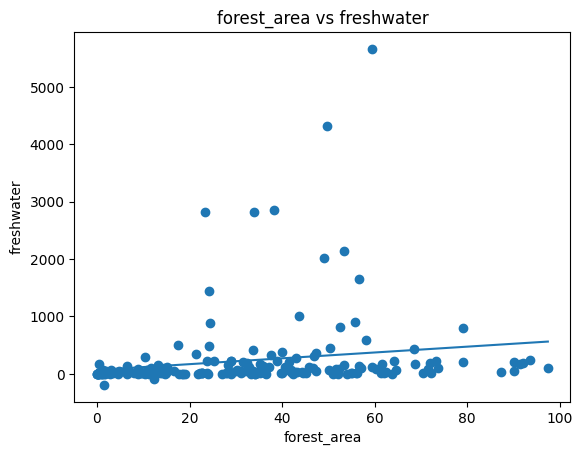

In [112]:
plt.title("forest_area vs freshwater")
plt.xlabel("forest_area")
plt.ylabel("freshwater")
plt.scatter(forest_area, freshwater)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, freshwater, 1))(np.unique(forest_area)))

In [113]:
corr = pearsonr(forest_area, freshwater)
corr

PearsonRResult(statistic=0.18113968010295217, pvalue=0.012150347519492604)

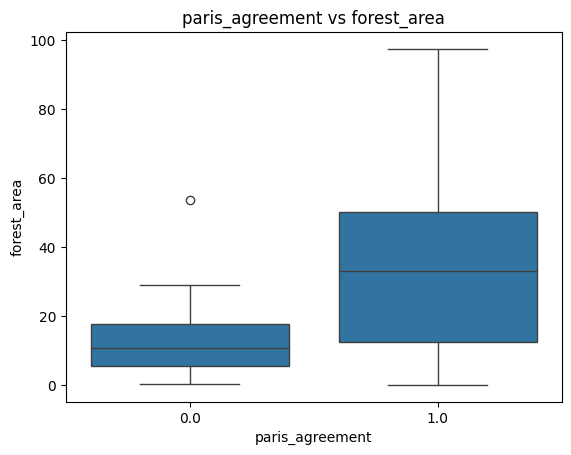

In [114]:
sns.boxplot(x=paris_agreement, y=forest_area)
plt.xlabel('paris_agreement')
plt.ylabel('forest_area')
plt.title('paris_agreement vs forest_area')
plt.show()

In [115]:
corr = pearsonr(forest_area, paris_agreement)
corr

PearsonRResult(statistic=0.19478100889281774, pvalue=0.006930446034669922)

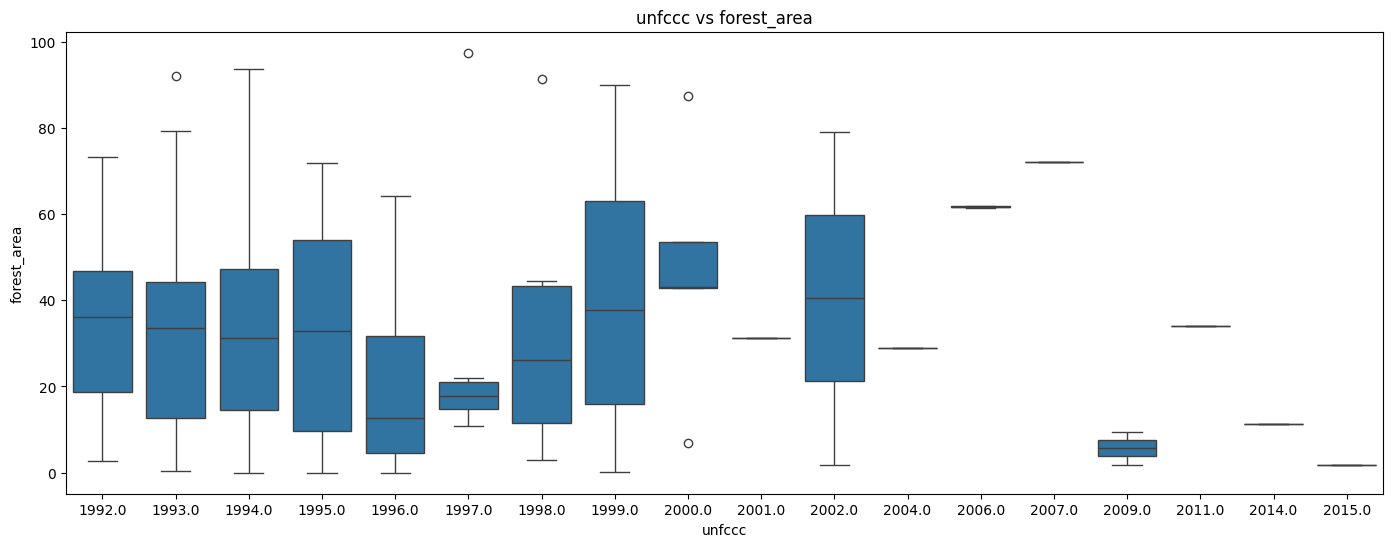

In [116]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=unfccc, y=forest_area)
plt.xlabel('unfccc')
plt.ylabel('forest_area')
plt.title('unfccc vs forest_area')
plt.show()

In [117]:
corr = pearsonr(forest_area, unfccc)
corr

PearsonRResult(statistic=-0.02276938468459805, pvalue=0.7545435073946324)

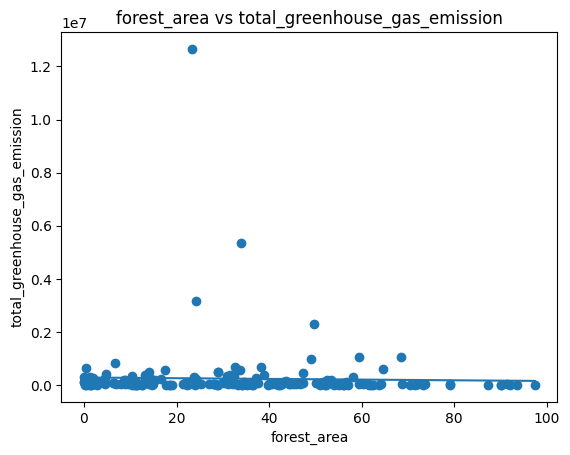

In [118]:
plt.title("forest_area vs total_greenhouse_gas_emission")
plt.xlabel("forest_area")
plt.ylabel("total_greenhouse_gas_emission")
plt.scatter(forest_area, total_greenhouse_gas_emission)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, total_greenhouse_gas_emission, 1))(np.unique(forest_area)))

In [119]:
corr = pearsonr(forest_area, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=-0.03033290685590346, pvalue=0.6770052630263677)

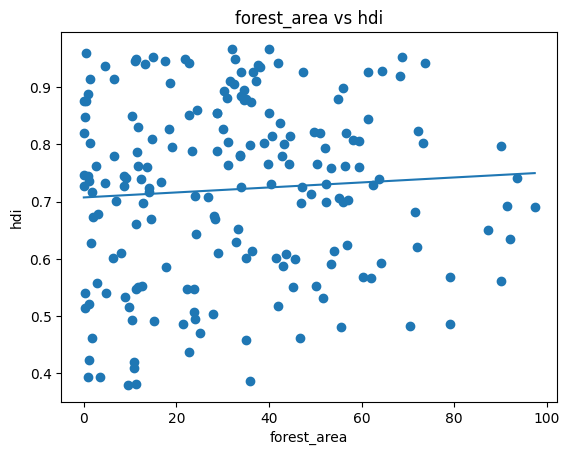

In [120]:
plt.title("forest_area vs hdi")
plt.xlabel("forest_area")
plt.ylabel("hdi")
plt.scatter(forest_area, hdi)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, hdi, 1))(np.unique(forest_area)))

In [121]:
corr = pearsonr(forest_area, hdi)
corr

PearsonRResult(statistic=0.06700445839224102, pvalue=0.35706250180544574)

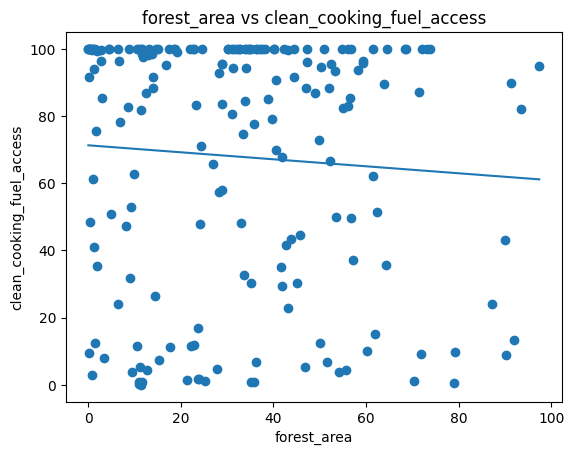

In [122]:
plt.title("forest_area vs clean_cooking_fuel_access")
plt.xlabel("forest_area")
plt.ylabel("clean_cooking_fuel_access")
plt.scatter(forest_area, clean_cooking_fuel_access)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, clean_cooking_fuel_access, 1))(np.unique(forest_area)))

In [123]:
corr = pearsonr(forest_area, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=-0.06688791518239665, pvalue=0.3579013519629627)

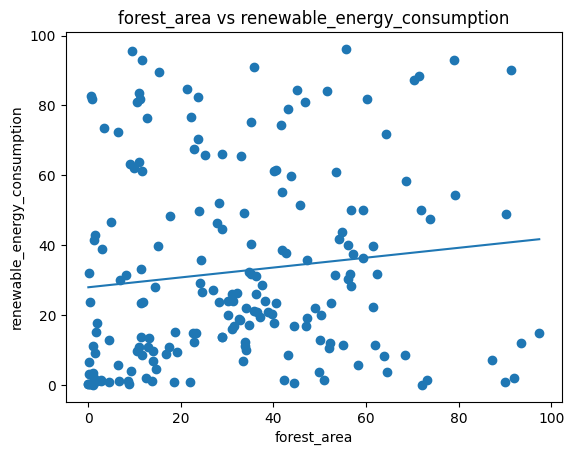

In [124]:
plt.title("forest_area vs renewable_energy_consumption")
plt.xlabel("forest_area")
plt.ylabel("renewable_energy_consumption")
plt.scatter(forest_area, renewable_energy_consumption)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, renewable_energy_consumption, 1))(np.unique(forest_area)))

In [125]:
corr = pearsonr(forest_area, renewable_energy_consumption)
corr

PearsonRResult(statistic=0.1218089654834384, pvalue=0.0932223408195959)

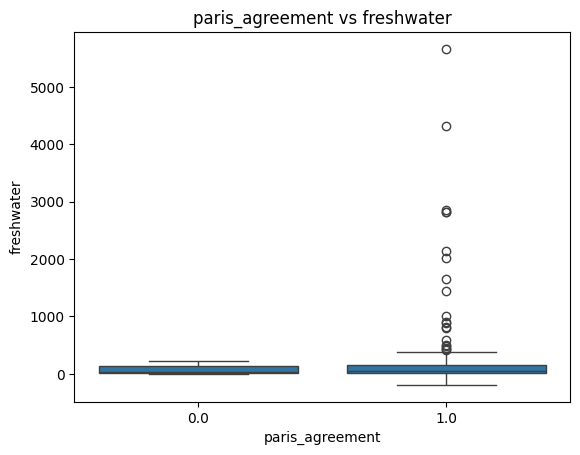

In [126]:
sns.boxplot(x=paris_agreement, y=freshwater)
plt.xlabel('paris_agreement')
plt.ylabel('freshwater')
plt.title('paris_agreement vs freshwater')
plt.show()

In [127]:
corr = pearsonr(freshwater, paris_agreement)
corr

PearsonRResult(statistic=0.060998519443600775, pvalue=0.4018827649671049)

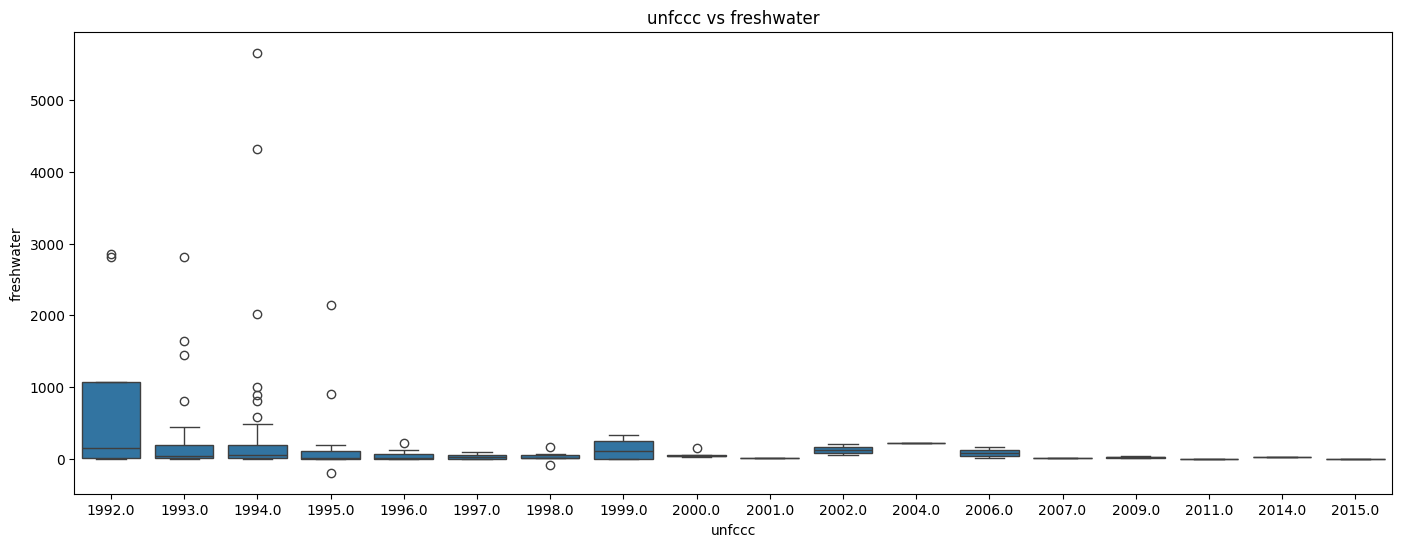

In [128]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=unfccc, y=freshwater)
plt.xlabel('unfccc')
plt.ylabel('freshwater')
plt.title('unfccc vs freshwater')
plt.show()

In [129]:
corr = pearsonr(freshwater, unfccc)
corr

PearsonRResult(statistic=-0.13050422335984627, pvalue=0.07194460427806199)

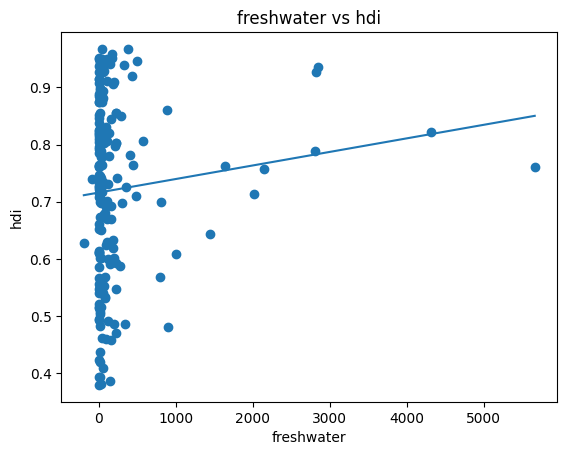

In [130]:
plt.title("freshwater vs hdi")
plt.xlabel("freshwater")
plt.ylabel("hdi")
plt.scatter(freshwater, hdi)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, hdi, 1))(np.unique(freshwater)))

In [131]:
corr = pearsonr(freshwater, hdi)
corr

PearsonRResult(statistic=0.10207969840391153, pvalue=0.15996711408795952)

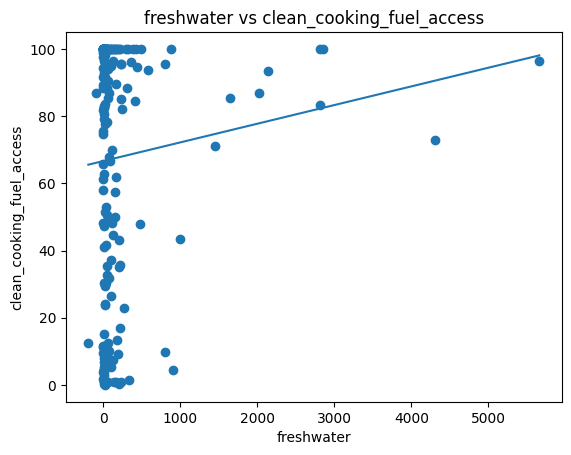

In [132]:
plt.title("freshwater vs clean_cooking_fuel_access")
plt.xlabel("freshwater")
plt.ylabel("clean_cooking_fuel_access")
plt.scatter(freshwater, clean_cooking_fuel_access)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, clean_cooking_fuel_access, 1))(np.unique(freshwater)))

In [133]:
corr = pearsonr(freshwater, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.10023407750407114, pvalue=0.16769559183437757)

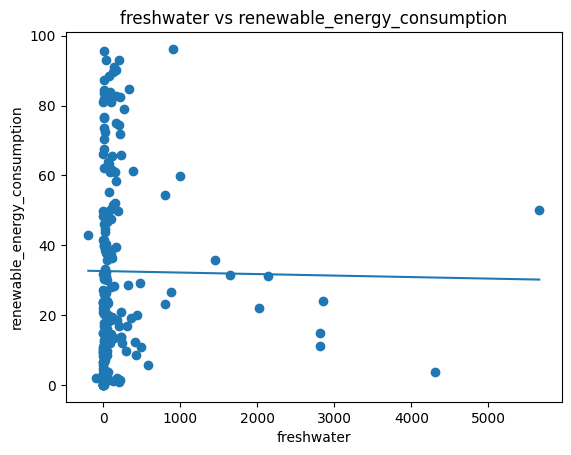

In [134]:
plt.title("freshwater vs renewable_energy_consumption")
plt.xlabel("freshwater")
plt.ylabel("renewable_energy_consumption")
plt.scatter(freshwater, renewable_energy_consumption)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, renewable_energy_consumption, 1))(np.unique(freshwater)))

In [135]:
corr = pearsonr(freshwater, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.010419362800083303, pvalue=0.8862450914953754)

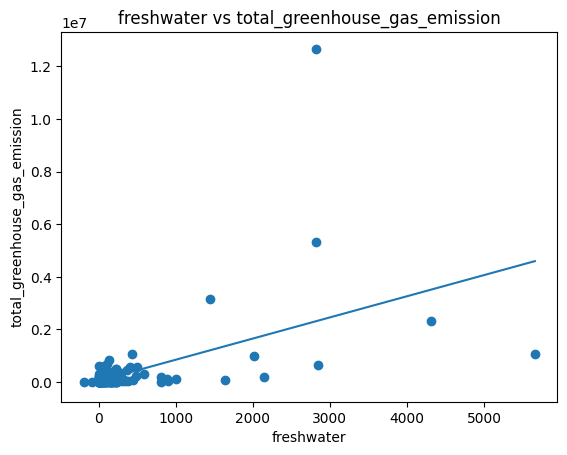

In [136]:
plt.title("freshwater vs total_greenhouse_gas_emission")
plt.xlabel("freshwater")
plt.ylabel("total_greenhouse_gas_emission")
plt.scatter(freshwater, total_greenhouse_gas_emission)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, total_greenhouse_gas_emission, 1))(np.unique(freshwater)))

In [137]:
corr = pearsonr(freshwater, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.5207205897290882, pvalue=1.1479604997499057e-14)

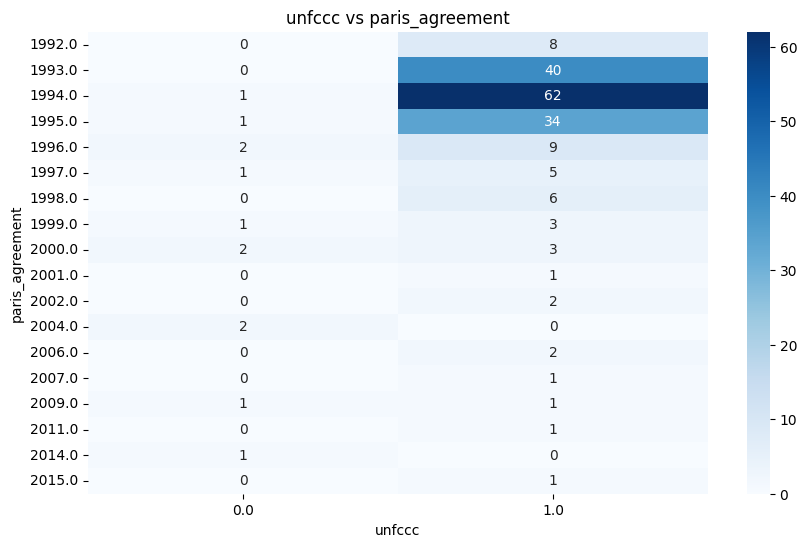

In [138]:
ct_counts = lcdci_df.groupby(['unfccc', 'paris_agreement']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(ct_counts, annot=True, cmap='Blues')
plt.xlabel('unfccc')
plt.ylabel('paris_agreement')
plt.title('unfccc vs paris_agreement')
plt.show()

In [139]:
corr = pearsonr(paris_agreement, unfccc)
corr

PearsonRResult(statistic=-0.36923692320802887, pvalue=1.4690612658042357e-07)

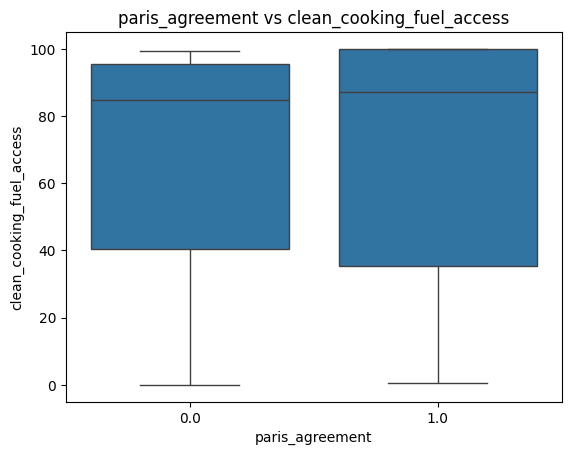

In [140]:
sns.boxplot(x=paris_agreement, y=clean_cooking_fuel_access)
plt.xlabel('paris_agreement')
plt.ylabel('clean_cooking_fuel_access')
plt.title('paris_agreement vs clean_cooking_fuel_access')
plt.show()

In [141]:
corr = pearsonr(paris_agreement, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.025579322508738483, pvalue=0.7254006586763072)

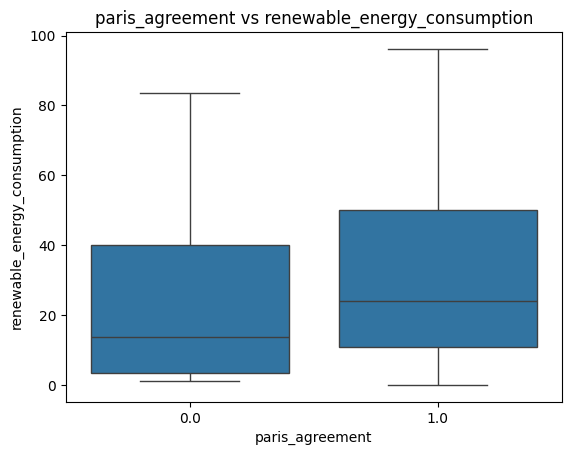

In [142]:
sns.boxplot(x=paris_agreement, y=renewable_energy_consumption)
plt.xlabel('paris_agreement')
plt.ylabel('renewable_energy_consumption')
plt.title('paris_agreement vs renewable_energy_consumption')
plt.show()

In [143]:
corr = pearsonr(paris_agreement, renewable_energy_consumption)
corr

PearsonRResult(statistic=0.04579366771928658, pvalue=0.5293118771321644)

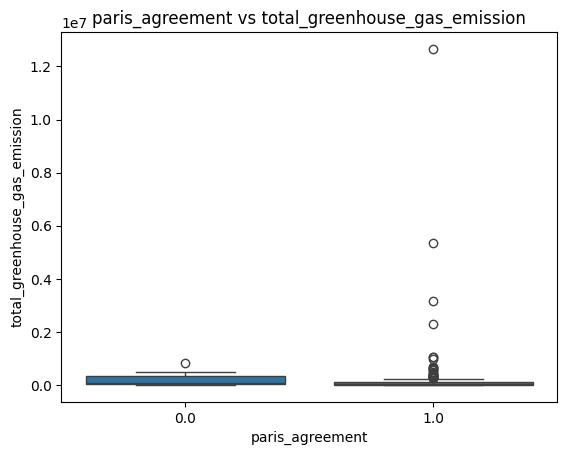

In [144]:
sns.boxplot(x=paris_agreement, y=total_greenhouse_gas_emission)
plt.xlabel('paris_agreement')
plt.ylabel('total_greenhouse_gas_emission')
plt.title('paris_agreement vs total_greenhouse_gas_emission')
plt.show()

In [145]:
corr = pearsonr(paris_agreement, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.009029991709083147, pvalue=0.9013308804375987)

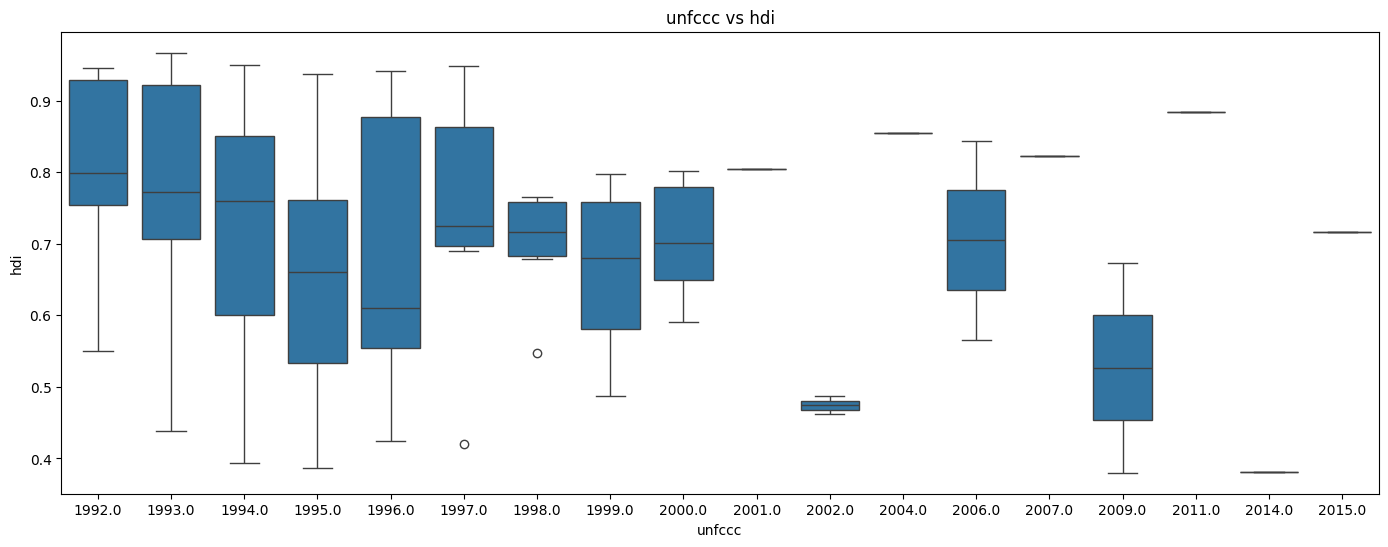

In [146]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=unfccc, y=hdi)
plt.xlabel('unfccc')
plt.ylabel('hdi')
plt.title('unfccc vs hdi')
plt.show()

In [147]:
corr = pearsonr(unfccc, hdi)
corr

PearsonRResult(statistic=-0.16382327650829304, pvalue=0.023540799504886828)

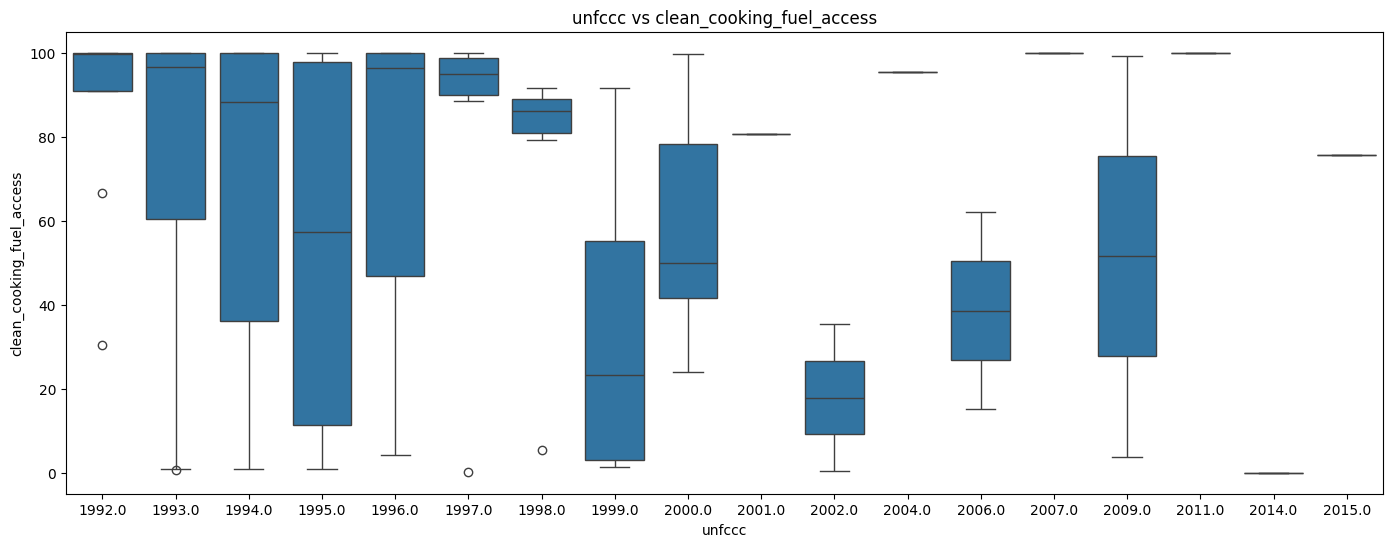

In [148]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=unfccc, y=clean_cooking_fuel_access)
plt.xlabel('unfccc')
plt.ylabel('clean_cooking_fuel_access')
plt.title('unfccc vs clean_cooking_fuel_access')
plt.show()

In [149]:
corr = pearsonr(unfccc, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=-0.11973730091010548, pvalue=0.09896729367636407)

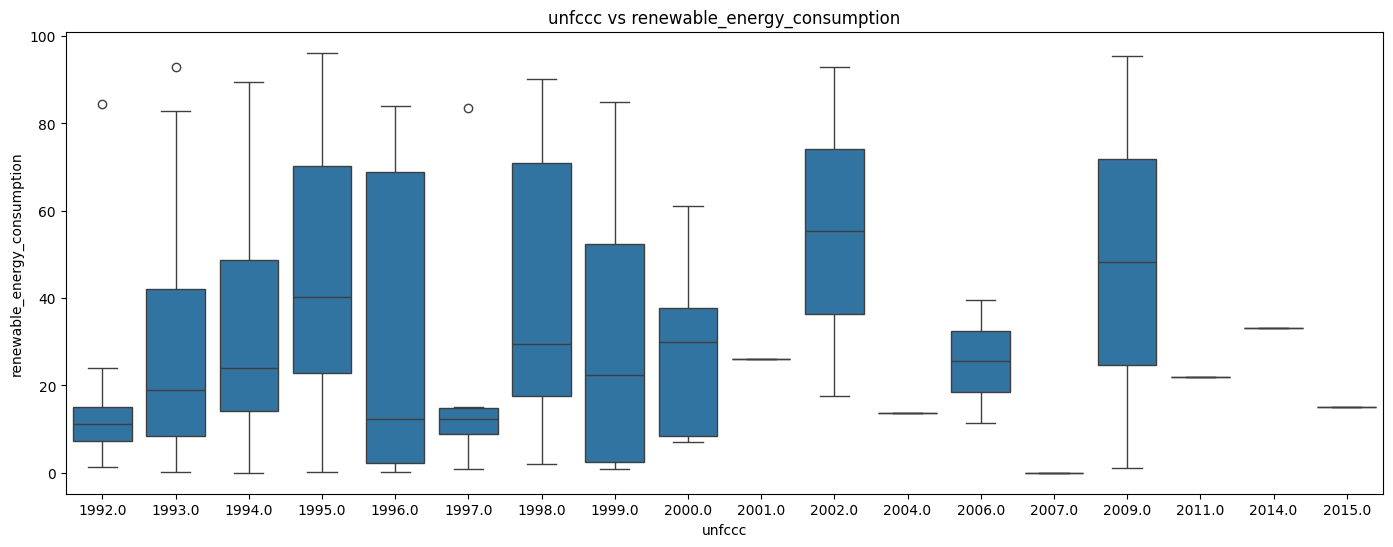

In [150]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=unfccc, y=renewable_energy_consumption)
plt.xlabel('unfccc')
plt.ylabel('renewable_energy_consumption')
plt.title('unfccc vs renewable_energy_consumption')
plt.show()

In [151]:
corr = pearsonr(unfccc, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.0030270450726316363, pvalue=0.9668494011451338)

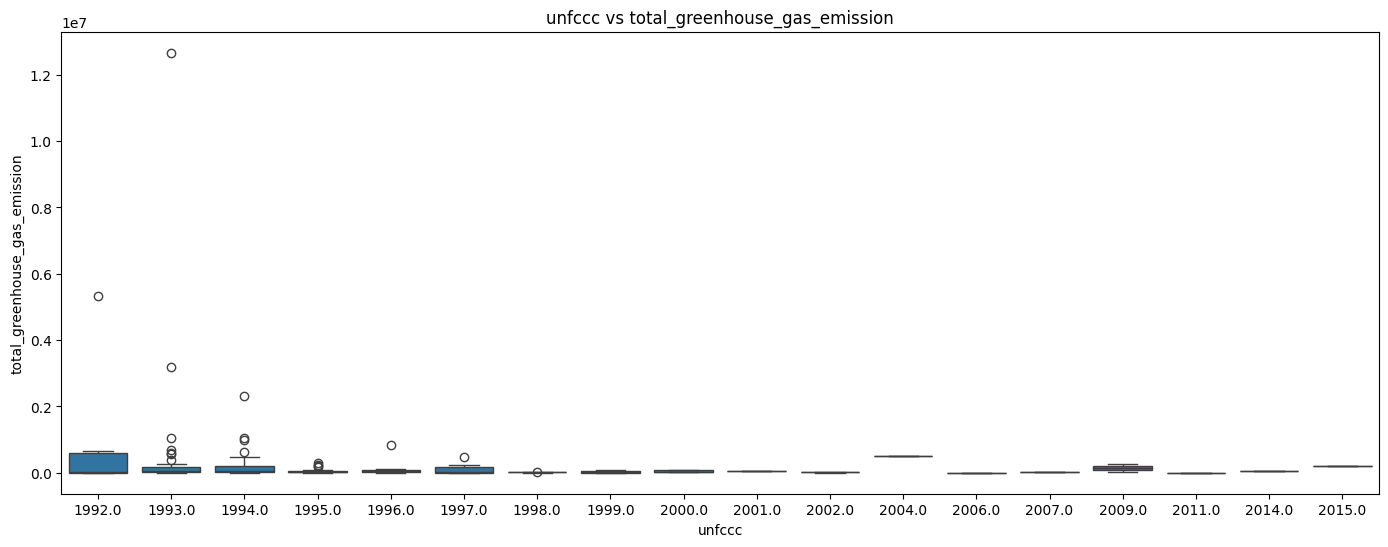

In [152]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=unfccc, y=total_greenhouse_gas_emission)
plt.xlabel('unfccc')
plt.ylabel('total_greenhouse_gas_emission')
plt.title('unfccc vs total_greenhouse_gas_emission')
plt.show()

In [153]:
corr = pearsonr(unfccc, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=-0.08965562589785203, pvalue=0.21742010757825636)

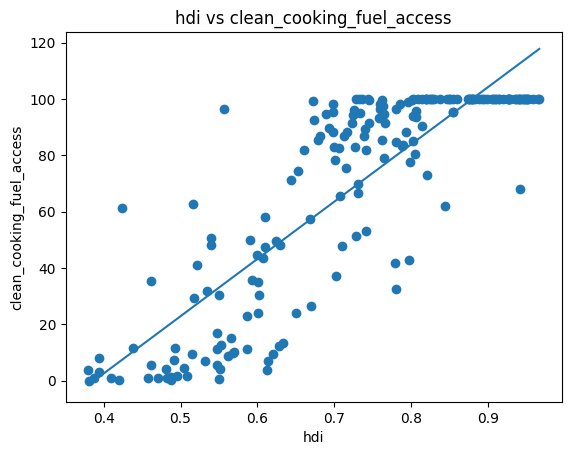

In [154]:
plt.title("hdi vs clean_cooking_fuel_access")
plt.xlabel("hdi")
plt.ylabel("clean_cooking_fuel_access")
plt.scatter(hdi, clean_cooking_fuel_access)
plt.plot(np.unique(hdi), np.poly1d(np.polyfit(hdi, clean_cooking_fuel_access, 1))(np.unique(hdi)))

In [155]:
corr = pearsonr(hdi, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.8507065500304598, pvalue=1.10342276579223e-54)

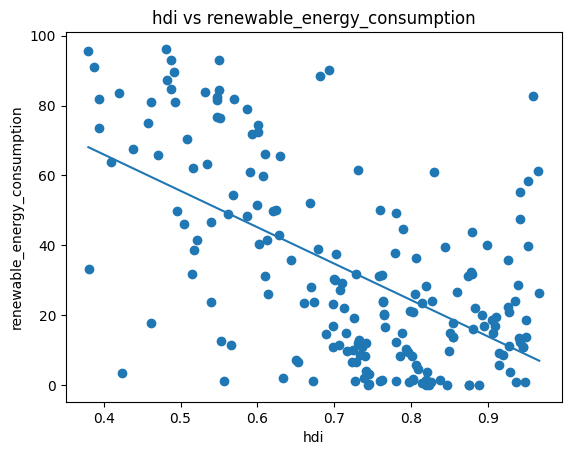

In [156]:
plt.title("hdi vs renewable_energy_consumption")
plt.xlabel("hdi")
plt.ylabel("renewable_energy_consumption")
plt.scatter(hdi, renewable_energy_consumption)
plt.plot(np.unique(hdi), np.poly1d(np.polyfit(hdi, renewable_energy_consumption, 1))(np.unique(hdi)))

In [157]:
corr = pearsonr(hdi, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.5848459224758495, pvalue=6.477071653091323e-19)

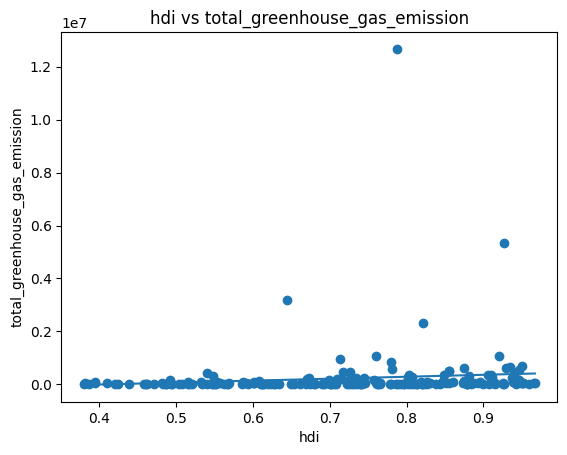

In [158]:
plt.title("hdi vs total_greenhouse_gas_emission")
plt.xlabel("hdi")
plt.ylabel("total_greenhouse_gas_emission")
plt.scatter(hdi, total_greenhouse_gas_emission)
plt.plot(np.unique(hdi), np.poly1d(np.polyfit(hdi, total_greenhouse_gas_emission, 1))(np.unique(hdi)))

In [159]:
corr = pearsonr(hdi, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.11044198699327318, pvalue=0.12826587759540758)

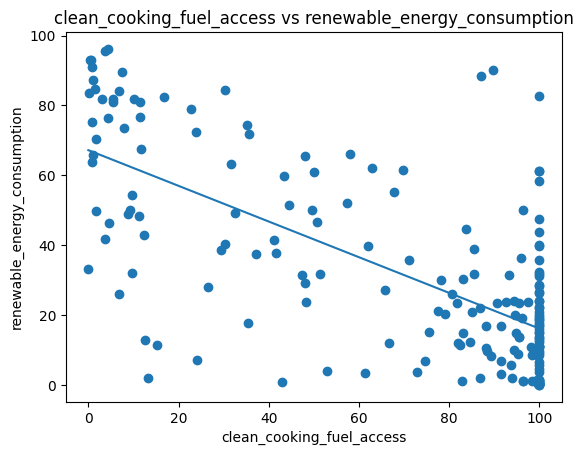

In [160]:
plt.title("clean_cooking_fuel_access vs renewable_energy_consumption")
plt.xlabel("clean_cooking_fuel_access")
plt.ylabel("renewable_energy_consumption")
plt.scatter(clean_cooking_fuel_access, renewable_energy_consumption)
plt.plot(np.unique(clean_cooking_fuel_access), np.poly1d(np.polyfit(clean_cooking_fuel_access, renewable_energy_consumption, 1))(np.unique(clean_cooking_fuel_access)))

In [161]:
corr = pearsonr(clean_cooking_fuel_access, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.6850037518686178, pvalue=8.48295671544377e-28)

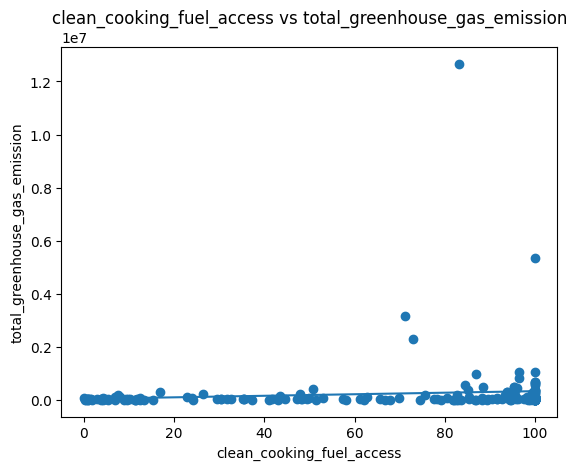

In [162]:
plt.title("clean_cooking_fuel_access vs total_greenhouse_gas_emission")
plt.xlabel("clean_cooking_fuel_access")
plt.ylabel("total_greenhouse_gas_emission")
plt.scatter(clean_cooking_fuel_access, total_greenhouse_gas_emission)
plt.plot(np.unique(clean_cooking_fuel_access), np.poly1d(np.polyfit(clean_cooking_fuel_access, total_greenhouse_gas_emission, 1))(np.unique(clean_cooking_fuel_access)))

In [163]:
corr = pearsonr(clean_cooking_fuel_access, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.10435712800301682, pvalue=0.15080249758076048)

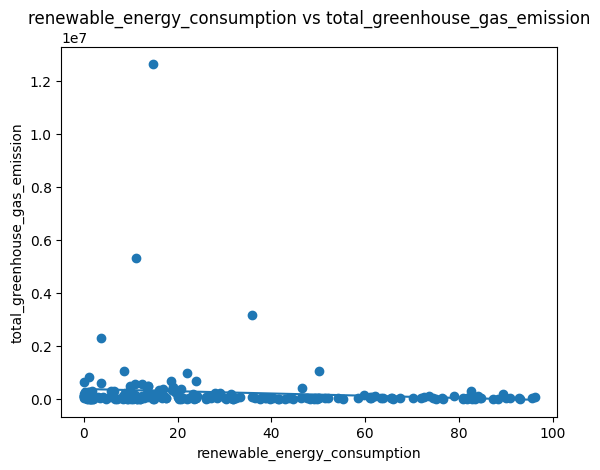

In [164]:
plt.title("renewable_energy_consumption vs total_greenhouse_gas_emission")
plt.xlabel("renewable_energy_consumption")
plt.ylabel("total_greenhouse_gas_emission")
plt.scatter(renewable_energy_consumption, total_greenhouse_gas_emission)
plt.plot(np.unique(renewable_energy_consumption), np.poly1d(np.polyfit(renewable_energy_consumption, total_greenhouse_gas_emission, 1))(np.unique(renewable_energy_consumption)))

In [165]:
corr = pearsonr(renewable_energy_consumption, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=-0.1136287078675787, pvalue=0.11754891256795619)

In [166]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [167]:
lcdci_df_dropped = lcdci_df.drop('country', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('region', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('co2_emissions', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('methane_emissions', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('nitrous_oxide_emissions', axis=1)
lcdci_df_dropped.head()

,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,total_greenhouse_gas_emission
0,0.82,11.2,1.0,1993.0,0.745,99.7,0.2,260685.671220
1,53.43,148.0,0.0,2000.0,0.591,50.0,61.0,70275.605950
2,27.80,10.3,1.0,1994.0,0.504,4.6,46.2,15017.664044
3,26.92,2.4,1.0,1994.0,0.708,65.7,27.2,12161.814371
4,22.72,12.5,1.0,1993.0,0.438,11.7,67.5,30925.645070


In [168]:
scaler = StandardScaler()
lcdci_df_scaled = scaler.fit_transform(lcdci_df_dropped)

In [169]:
pca = PCA() 

In [170]:
lcdci_df_pca = pca.fit_transform(lcdci_df_scaled)

In [171]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31399203, 0.20131588, 0.1660046 , 0.12419502, 0.07467221,
       0.05553615, 0.04859824, 0.01568587])

In [172]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([31.4, 20.1, 16.6, 12.4,  7.5,  5.6,  4.9,  1.6])

In [201]:
loading_scores_pca = np.round(pca.components_[:6] * 100) 

loading_scores_df = pd.DataFrame(loading_scores_pca.T, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'], index=lcdci_df_dropped.columns.tolist())

loading_scores_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
forest_area,1.0,34.0,-22.0,82.0,-20.0,-33.0
freshwater,-16.0,54.0,42.0,10.0,-12.0,61.0
paris_agreement,-9.0,40.0,-55.0,-11.0,70.0,12.0
unfccc,15.0,-39.0,40.0,50.0,61.0,20.0
hdi,-57.0,-7.0,-13.0,14.0,-4.0,14.0
cooking_clean_fuel_and_technologies_access,-58.0,-16.0,-3.0,5.0,-8.0,17.0
renewable_energy_consumption,50.0,25.0,-7.0,-2.0,-13.0,32.0
total_greenhouse_gas_emission,-18.0,42.0,54.0,-19.0,25.0,-56.0


Text(0.5, 1.0, 'Scree Plot')

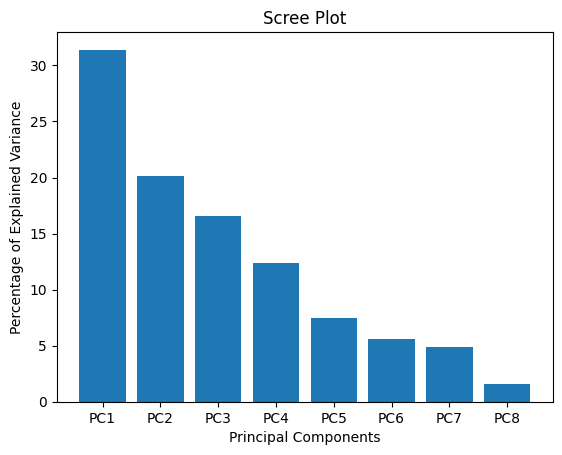

In [174]:
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")

In [175]:
from sklearn.cluster import KMeans

In [176]:
selected_components = lcdci_df_pca[:, :6]

In [177]:
from sklearn.metrics import silhouette_score 

In [178]:
num_clusters = 5

In [191]:
# best_random_state = None 
# best_silhouette_score = -1.0  

# random_state_values = range(0, 1000)

# for random_state in random_state_values:
#     kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
#     clusters = kmeans.fit_predict(selected_components)
#     silhouette_avg = silhouette_score(selected_components, clusters)

#     if silhouette_avg > best_silhouette_score:
#         best_silhouette_score = silhouette_avg
#         best_random_state = random_state

# print("Best random state:", best_random_state)
# print("Best silhouette score:", best_silhouette_score)

Best random state: 145
Best silhouette score: 0.4295117681115165


In [192]:
kmeans = KMeans(n_clusters=num_clusters, random_state=145)
clusters = kmeans.fit_predict(selected_components)

In [193]:
silhouette_avg = silhouette_score(selected_components, clusters)
print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.4295117681115165


In [194]:
colour_list = ['blue', 'green', 'red', 'orange', 'purple'] 
region_colours = dict(zip(lcdci_df['region'].unique(), colour_list))
colours = lcdci_df['region'].map(region_colours) 
region_colours


{'African Group': 'blue',
 'Asia-Pacific Group': 'green',
 'Eastern European Group': 'red',
 'GRULAC': 'orange',
 'WEOG': 'purple'}

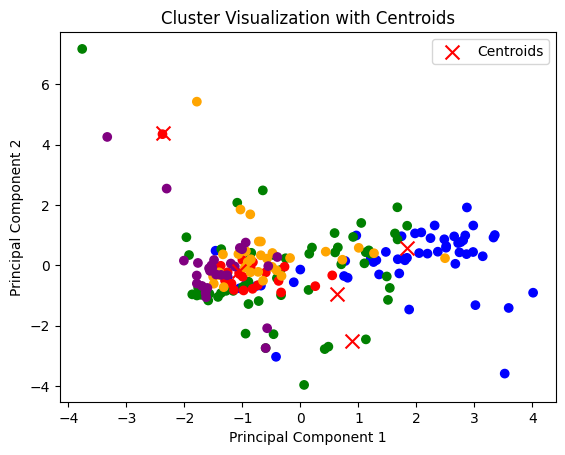

In [195]:
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=colours)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.show()

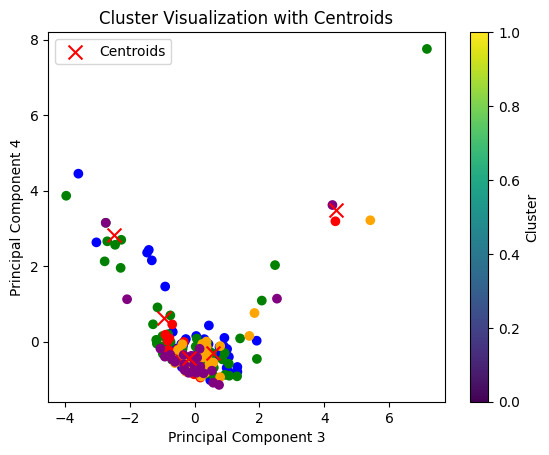

In [196]:
plt.scatter(selected_components[:, 1], selected_components[:, 2], c=colours)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In [185]:
lcdci_df['cluster'] = clusters 
grouped_df = lcdci_df.groupby('cluster')
grouped_df.describe()

forest_area                                                         \
              count       mean        std    min      25%     50%      75%   
cluster                                                                      
0              50.0  24.494200  17.988678   0.25   9.9925  23.235  36.1600   
1              47.0   9.765957   9.059603   0.00   1.5600   8.780  13.8500   
2              20.0  69.258500  20.757278  11.33  57.0550  71.695  87.9725   
3               4.0  41.602500  16.100158  23.34  31.2375  41.825  52.1900   
4              70.0  42.314571  16.213782   0.51  32.2125  40.055  53.0850   

               freshwater                                                   \
           max      count         mean          std          min       25%   
cluster                                                                      
0        70.41       50.0    95.782783   196.649756  -193.460871     9.625   
1        34.04       47.0    31.067912    67.689182   -89.508143     0.650   
2        97.41       20.0   139.869345   172.649048     2.200000    33.125   
3        59.42        4.0  3900.975000  1369.108178  2812.900000  2816.725   
4        93.55       70.0   273.210525   538.904079     0.000000    15.350   

                                          paris_agreement                      \
                 50%          75%     max           count      mean       std   
cluster                                                                         
0          28.050000   108.150000  1002.8            50.0  0.960000  0.197949   
1           4.200000    35.000000   292.0            47.0  0.829787  0.379883   
2         100.835327   182.198286   801.0            20.0  0.900000  0.307794   
3        3565.000000  4649.250000  5661.0             4.0  1.000000  0.000000   
4          58.050000   236.875000  2850.0            70.0  1.000000  0.000000   

                                 unfccc                                 \
         min  25%  50%  75%  max  count         mean       std     min   
cluster                                                                  
0        0.0  1.0  1.0  1.0  1.0   50.0  1994.960000  2.602667  1992.0   
1        0.0  1.0  1.0  1.0  1.0   47.0  1996.553191  4.826595  1992.0   
2        0.0  1.0  1.0  1.0  1.0   20.0  1999.150000  5.537195  1993.0   
3        1.0  1.0  1.0  1.0  1.0    4.0  1993.250000  0.957427  1992.0   
4        1.0  1.0  1.0  1.0  1.0   70.0  1993.900000  1.320408  1992.0   

                                           hdi                             \
             25%     50%     75%     max count      mean       std    min   
cluster                                                                     
0        1994.00  1994.0  1995.0  2009.0  50.0  0.532901  0.081149  0.380   
1        1994.00  1995.0  1997.0  2015.0  47.0  0.790681  0.107511  0.424   
2        1995.00  1998.5  2000.5  2014.0  20.0  0.644900  0.113043  0.381   
3        1992.75  1993.5  1994.0  1994.0   4.0  0.824000  0.073052  0.760   
4        1993.00  1994.0  1994.0  2000.0  70.0  0.825686  0.089715  0.644   

                                          \
             25%     50%      75%    max   
cluster                                    
0        0.48400  0.5370  0.59675  0.780   
1        0.73000  0.7800  0.87500  0.950   
2        0.58525  0.6290  0.69525  0.844   
3        0.78100  0.8045  0.84750  0.927   
4        0.75900  0.8170  0.90900  0.967   

        cooking_clean_fuel_and_technologies_access                        \
                                             count       mean        std   
cluster                                                                    
0                                             50.0  19.552000  18.764200   
1                                             47.0  94.046466  10.345366   
2                                             20.0  38.755000  33.133581   
3                                              4.0  88.150000  12.479450   
4             

In [186]:
cluster_0_countries = lcdci_df[lcdci_df['cluster'] == 0] 
cluster_0_countries


,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission,cluster
2,Benin,African Group,27.80,10.300000,1.0,1994.0,0.504000,4.6,46.2,7980.400,4029.619412,3007.644632,15017.664044,0
4,Burkina Faso,African Group,22.72,12.500000,1.0,1993.0,0.438000,11.7,67.5,5456.700,15408.273140,10060.671930,30925.645070,0
5,Burundi,African Group,10.89,10.100000,0.0,1997.0,0.420000,0.2,83.5,713.466,1258.191520,1636.389411,3608.046931,0
7,Cameroon,African Group,43.03,273.000000,1.0,1994.0,0.587000,22.8,78.9,9928.400,17797.745450,62399.453370,90125.598820,0
8,Central African Republic,African Group,35.80,141.000000,1.0,1995.0,0.387000,0.9,90.9,236.600,10108.504700,10628.579070,20973.683770,0
9,Chad,African Group,3.43,15.000000,1.0,1994.0,0.394000,8.0,73.6,1568.400,59438.922980,27724.591160,88731.914140,0
10,Comoros,African Group,17.70,1.200000,1.0,1994.0,0.586000,11.3,48.3,328.200,236.817870,46.815800,611.833670,0
12,Côte d’Ivoire,African Group,8.92,76.800000,1.0,1994.0,0.534000,31.7,63.3,10894.900,7980.365269,3544.205981,22419.471250,0
13,Democratic Republic of the Congo,African Group,55.65,900.000000,1.0,1995.0,0.481000,4.3,96.2,3025.600,35684.209370,14960.565840,53670.375210,0
14,Djibouti,African Group,0.25,0.300000,1.0,1995.0,0.515000,9.6,31.9,427.700,659.922854,259.183065,1346.805919,0


In [187]:
cluster_1_countries = lcdci_df[lcdci_df['cluster'] == 1] 
cluster_1_countries

,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission,cluster
0,Algeria,African Group,0.82,11.200000,1.0,1993.0,0.745,99.700000,0.2,161563.000000,86543.923620,12578.747600,260685.671220,1
6,Cabo Verde,African Group,11.34,0.300000,1.0,1995.0,0.661,81.800000,23.4,620.600000,93.207601,59.475638,773.283239,1
15,Egypt,African Group,0.05,1.000000,1.0,1994.0,0.728,99.900000,6.5,210752.300000,64402.919250,20471.527980,295626.747230,1
27,Libya,African Group,0.12,0.700000,0.0,1999.0,0.746,91.609610,3.1,44467.000000,24033.120050,1797.652497,70297.772547,1
33,Morocco,African Group,12.87,29.000000,1.0,1995.0,0.698,98.200000,10.9,66719.500000,12029.805020,8693.633782,87442.938802,1
44,South Africa,African Group,14.06,44.800000,1.0,1997.0,0.717,88.400000,9.8,393241.600000,72213.215140,17992.987140,483447.802280,1
49,Tunisia,African Group,4.52,4.200000,1.0,1993.0,0.732,99.900000,12.9,29293.000000,6653.819385,3298.027330,39244.846715,1
55,Bahrain,Asia-Pacific Group,0.91,0.000000,1.0,1994.0,0.888,100.000000,0.0,32470.200000,17641.434030,171.638398,50283.272428,1
61,Cyprus,Asia-Pacific Group,18.67,0.800000,1.0,1997.0,0.907,100.000000,15.0,6771.800000,749.702555,371.658180,7893.160735,1
66,Iran (Islamic Republic of),Asia-Pacific Group,6.60,128.500000,0.0,1996.0,0.780,96.400000,1.0,616561.300000,174641.970500,39719.808260,830923.078760,1


In [188]:
cluster_2_countries = lcdci_df[lcdci_df['cluster'] == 2] 
cluster_2_countries

,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission,cluster
1,Angola,African Group,53.43,148.000000,0.0,2000.0,0.591,50.0,61.0,19814.50,32703.238110,17757.867840,70275.605950,2
11,Congo,African Group,64.26,222.000000,1.0,1996.0,0.593,35.6,71.9,7153.90,9957.260368,1610.016398,18721.176766,2
16,Equatorial Guinea,African Group,87.29,26.000000,1.0,2000.0,0.650,24.1,7.0,4350.40,4778.315427,33.339292,9162.054719,2
19,Gabon,African Group,91.32,164.000000,1.0,1998.0,0.693,89.7,90.1,5349.20,7451.564220,523.122457,13323.886677,2
26,Liberia,African Group,79.08,200.000000,1.0,2002.0,0.487,0.4,93.0,1179.50,338.868895,295.301944,1813.670839,2
39,Sao Tome and Principe,African Group,54.06,2.200000,1.0,1999.0,0.613,3.7,41.6,141.10,11.596147,17.434243,170.130390,2
45,South Sudan,African Group,11.33,26.000000,0.0,2014.0,0.381,0.0,33.2,1742.70,32385.920390,21818.260390,55946.880780,2
57,Bhutan,Asia-Pacific Group,71.49,78.000000,1.0,1995.0,0.681,87.0,88.4,1035.20,451.523887,97.265439,1583.989326,2
58,Brunei Darussalam,Asia-Pacific Group,72.11,8.500000,1.0,2007.0,0.823,100.0,0.0,9588.00,1538.873884,137.896432,11264.770316,2
74,Lao People's Democratic Republic,Asia-Pacific Group,71.90,190.400000,1.0,1995.0,0.620,9.3,49.9,19178.90,8011.314315,3143.072183,30333.286498,2


In [189]:
cluster_3_countries = lcdci_df[lcdci_df['cluster'] == 3] 
cluster_3_countries

,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission,cluster
60,China,Asia-Pacific Group,23.34,2812.9,1.0,1993.0,0.788,83.2,14.8,10944686.2,1.186285e+06,536920.21030,1.266789e+07,3
126,Russian Federation,Eastern European Group,49.78,4312.0,1.0,1994.0,0.821,72.9,3.7,1618271.0,6.172273e+05,69231.05118,2.304729e+06,3
138,Brazil,GRULAC,59.42,5661.0,1.0,1994.0,0.760,96.5,50.1,414138.8,4.492140e+05,191103.25170,1.054456e+06,3
190,United States of America,WEOG,33.87,2818.0,1.0,1992.0,0.927,100.0,11.2,4320532.5,7.482414e+05,258002.35600,5.326776e+06,3


In [190]:
cluster_4_countries = lcdci_df[lcdci_df['cluster'] == 4] 
cluster_4_countries

,country,region,forest_area,freshwater,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission,cluster
3,Botswana,African Group,26.92,2.400000,1.0,1994.0,0.708,65.700000,27.2,5.763687e+03,3434.493820,2963.633551,1.216181e+04,4
32,Mauritius,African Group,19.10,2.800000,1.0,1992.0,0.796,98.900000,9.4,3.720200e+03,1973.725821,221.869467,5.915795e+03,4
41,Seychelles,African Group,73.26,220.980074,1.0,1992.0,0.802,100.000000,1.3,5.987000e+02,94.696179,4.039156,6.974353e+02,4
63,Fiji,Asia-Pacific Group,62.40,28.600000,1.0,1993.0,0.729,51.400000,31.8,1.028200e+03,443.648987,191.232612,1.663082e+03,4
64,India,Asia-Pacific Group,24.27,1446.000000,1.0,1993.0,0.644,71.100000,35.8,2.200836e+06,697654.670700,279003.791500,3.177495e+06,4
65,Indonesia,Asia-Pacific Group,49.07,2018.700000,1.0,1994.0,0.713,86.900000,22.0,5.631970e+05,333994.909500,75595.642590,9.727876e+05,4
68,Japan,Asia-Pacific Group,68.40,430.000000,1.0,1993.0,0.920,100.000000,8.5,1.014065e+06,25783.312330,18498.405330,1.058346e+06,4
76,Malaysia,Asia-Pacific Group,58.18,580.000000,1.0,1994.0,0.807,93.800000,5.8,2.451393e+05,37175.597930,9265.095907,2.915800e+05,4
78,Marshall Islands,Asia-Pacific Group,52.22,86.137278,1.0,1992.0,0.731,66.700000,12.0,1.100000e+02,31.911030,0.699535,1.426106e+02,4
87,Philippines,Asia-Pacific Group,24.11,479.000000,1.0,1994.0,0.710,48.000000,29.1,1.334713e+05,65722.006820,14455.782310,2.136491e+05,4
